<a href="https://colab.research.google.com/github/DevanshiMishra028/MNIST_dataset/blob/main/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
checkpoint=['GPU','CPU']
for device in checkpoint:
  out_=tf.config.list_physical_devices(device)
  if len(out_)>0:
    print(f"{device} is available")
    print(f"details\n",out_)
  else:
    print(f"{device} is not available")

GPU is available
details
 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
print(f"the datatype of x_train:{x_train.dtype}\nthe shape of x_train:{x_train.shape}")

the datatype of x_train:uint8
the shape of x_train:(60000, 28, 28)


### NORMALIZATION OF DATASET & CREATING VALIDATION SET

In [ ]:
x_valid,x_train=x_train[:5000]/255,x_train[5000:]/255
y_valid,y_train=y_train[:5000],y_train[5000:]

x_test=x_test/255

### VISUALIZING THE DATA POINTS

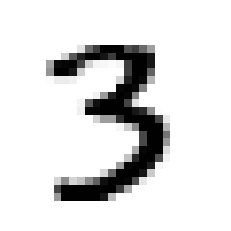

In [ ]:
plt.imshow(x_train[5000],cmap='binary')
plt.axis("off")
plt.show()

### TO VISUALIZE THE DATASET with array representation

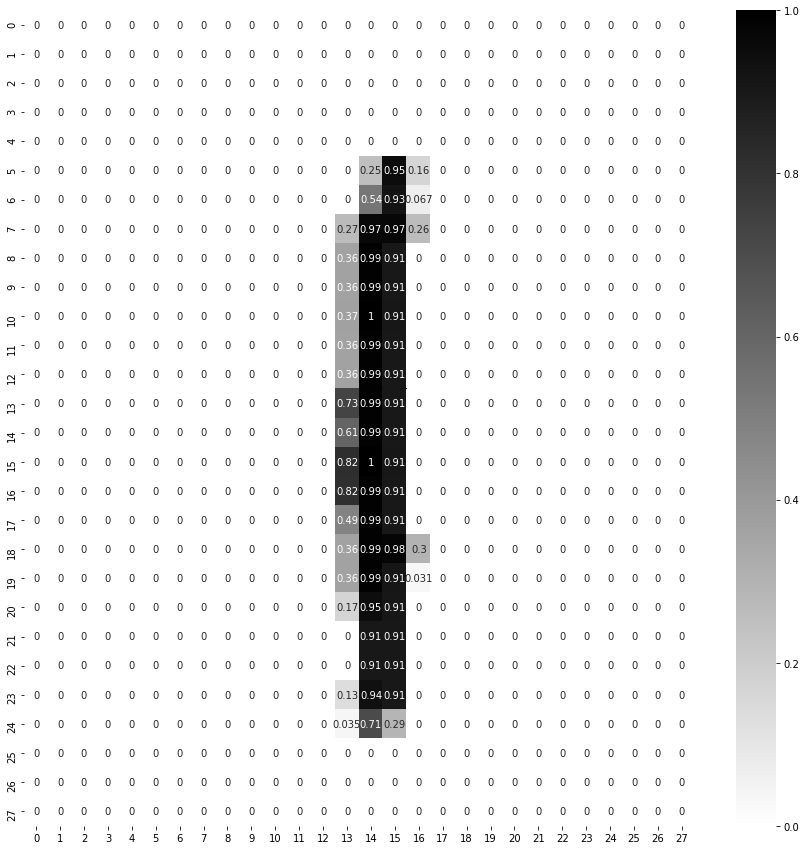

In [ ]:
plt.figure(figsize=(15,15)) #here,figsize doesn't refers to pixels value,just the size of img
sns.heatmap(x_train[9000],annot=True,cmap='binary')

In [ ]:
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name="input_layer"),
        tf.keras.layers.Dense(300,activation='relu',name="H1"),
        tf.keras.layers.Dense(300,activation='relu',name='H2'),
        tf.keras.layers.Dense(100,activation='relu',name='H3'),
        tf.keras.layers.Dense(10,activation='softmax',name="output")]


model_clf=tf.keras.models.Sequential(Layers)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
H1 (Dense)                   (None, 300)               235500    
_________________________________________________________________
H2 (Dense)                   (None, 300)               90300     
_________________________________________________________________
H3 (Dense)                   (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 356,910
Trainable params: 356,910
Non-trainable params: 0
_________________________________________________________________


##### b/w ip layer and h1 no of trainable parametre means :
####     sum of (no. of inputs from previous layers*no.of nuerons in next layer +no. bias is next layer )

In [ ]:
l1=model_clf.layers[0]
l1.name

'input_layer'

In [ ]:
l2=model_clf.layers[1]
l2.name

'H1'

In [ ]:
model_clf.get_layer(l2.name) is l2

True

In [ ]:
Loss="sparse_categorical_crossentropy"
Optimizer="SGD"
Metrics=["accuracy"]

model_clf.compile(loss=Loss,optimizer=Optimizer,metrics=Metrics)

#model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.SGD(0.2),metics=["accuracy"])

In [ ]:
Epochs=30
Validation_set=(x_valid,y_valid)
history=model_clf.fit(x_train,y_train,epochs=Epochs,validation_data=Validation_set)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6094 - accuracy: 0.8387 - val_loss: 0.2795 - val_accuracy: 0.9228
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2588 - accuracy: 0.9244 - val_loss: 0.2147 - val_accuracy: 0.9408
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2026 - accuracy: 0.9411 - val_loss: 0.1709 - val_accuracy: 0.9492
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1674 - accuracy: 0.9510 - val_loss: 0.1449 - val_accuracy: 0.9576
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1421 - accuracy: 0.9585 - val_loss: 0.1322 - val_accuracy: 0.9614
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1232 - accuracy: 0.9643 - val_loss: 0.1186 - val_accuracy: 0.9642
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9687 - val_loss: 0.1200 - val_accuracy:

In [ ]:
#unique_path=model_clf.save(save_path())
unique_path=model_clf.save("Model_mnist")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Model_mnist/assets


In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
tab=pd.DataFrame(history.history)

In [ ]:
tab

,loss,accuracy,val_loss,val_accuracy
0,0.614263,0.838800,0.283279,0.9210
1,0.268170,0.921473,0.223700,0.9358
2,0.212388,0.938145,0.186594,0.9460
3,0.174615,0.950073,0.151462,0.9594
4,0.147503,0.957236,0.132315,0.9626
5,0.127189,0.963345,0.123158,0.9664
6,0.111010,0.968164,0.119636,0.9666
7,0.097868,0.971982,0.105216,0.9686
8,0.086612,0.974855,0.092362,0.9742
9,0.078165,0.977600,0.089682,0.9750


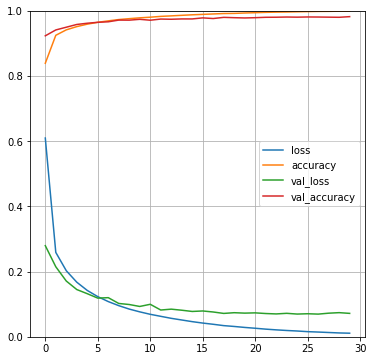

In [ ]:
pd.DataFrame(history.history).plot(figsize=(6,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9782


[0.07336996495723724, 0.9782000184059143]

In [ ]:
x_new=x_test[:3]
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
x_new=x_test[:3]
y_prob=model_clf.predict(x_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred=np.argmax(model_clf.predict(x_new),axis=-1)
y_pred

array([7, 2, 1])

In [ ]:
y_new=y_test[:3]

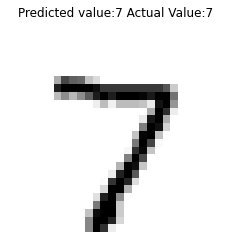

----------------------------------------------------------------------------------------------------------------------------------------------------------------


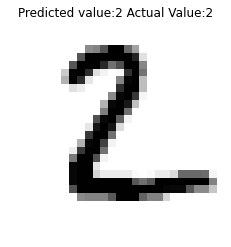

----------------------------------------------------------------------------------------------------------------------------------------------------------------


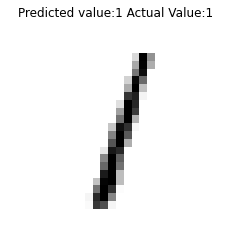

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for data,pred,actual in zip(x_new,y_pred,y_new):
  plt.imshow(data,cmap='binary')
  plt.title(f"Predicted value:{pred} Actual Value:{actual}")
  plt.axis("off")
  plt.show()
  print("--------"*20)

In [ ]:
y_pred=np.argmax(model_clf.predict(x_test),axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
sc=accuracy_score(y_pred,y_test)
sc